In [2]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive

drive.mount('/content/drive')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydrive: filename=PyDrive-1.3.1-py3-none-any.whl size=27433 sha256=3f785a128657f72033836df7e0e403d31e8a3d8f03f2be66f8b8e1bd415d2ed9
  Stored in directory: /root/.cache/pip/wheels/31/d5/09/88865e0059104686eb8365ca1d36a8b27deef34232c3b62c90
Successfully built pydrive
Mounted at /content/drive


In [3]:
!pip install mat4py
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 363.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=eb22989367cdbca173c2275b45f02763ce3bb8f7e610bd1ba3e8ae51ade5c073
  Stored in directory: /root/.cache/pip/wheels/07/e6/86/f23164d12c3134966614102db8e7956ab359faf7ffd78703ce
Successfully built func-timeout


In [4]:
root_path = 'drive/My Drive/TU/Master/MEP/Paper/Working_file_copied_from_final_code/Experiment_3+2b'
import sys, os
#path_dir = os.getcwd()
sys.path.append(root_path+"/Functions")

from general_functions import *
from muscle_functions import *
from integrator_functions import *
from matrices_functions import * #can make specific later if bloated
from constants_functions import *
from plot_functions import *
from save_functions import *

In [5]:
import matplotlib.font_manager as fm

helvetica_font = fm.FontProperties(fname=root_path+"/Functions"+'/Helvetica.ttf')
fm.fontManager.addfont(root_path+"/Functions"+'/Helvetica.ttf') # Add the font to Matplotlib's font manager
# Set the global font to helvetica_font
plt.rcParams['font.family'] = helvetica_font.get_name()

In [7]:
huxdata =  xr.open_dataset('drive/My Drive/TU/Master/MEP/Paper/Working_file_copied_from_final_code/Experiment_3+2b/Results/data/best_NEW_OKT_huxleytraj3traj_error_data_ogfbvec_[99.25994797, 8.53835633, -1.24112202, 0.10921817]THIS')
hill1data = xr.open_dataset('drive/My Drive/TU/Master/MEP/Paper/Working_file_copied_from_final_code/Experiment_3+2b/Results/data/best_NEW_OKT_thijstraj3traj_error_data_ogfbvec_[179.588357, 14.8266795, -0.951596047, -0.0274214174]THIS')
huxopttrajs = xr.open_dataset('drive/My Drive/TU/Master/MEP/Paper/Working_file_copied_from_final_code/Experiment_3+2b/Results/data/best_NEW_OKT_huxleytraj3optimal_foundtrajectories')
hill1opttrajs = xr.open_dataset('drive/My Drive/TU/Master/MEP/Paper/Working_file_copied_from_final_code/Experiment_3+2b/Results/data/best_NEW_OKT_thijstraj3optimal_foundtrajectories')

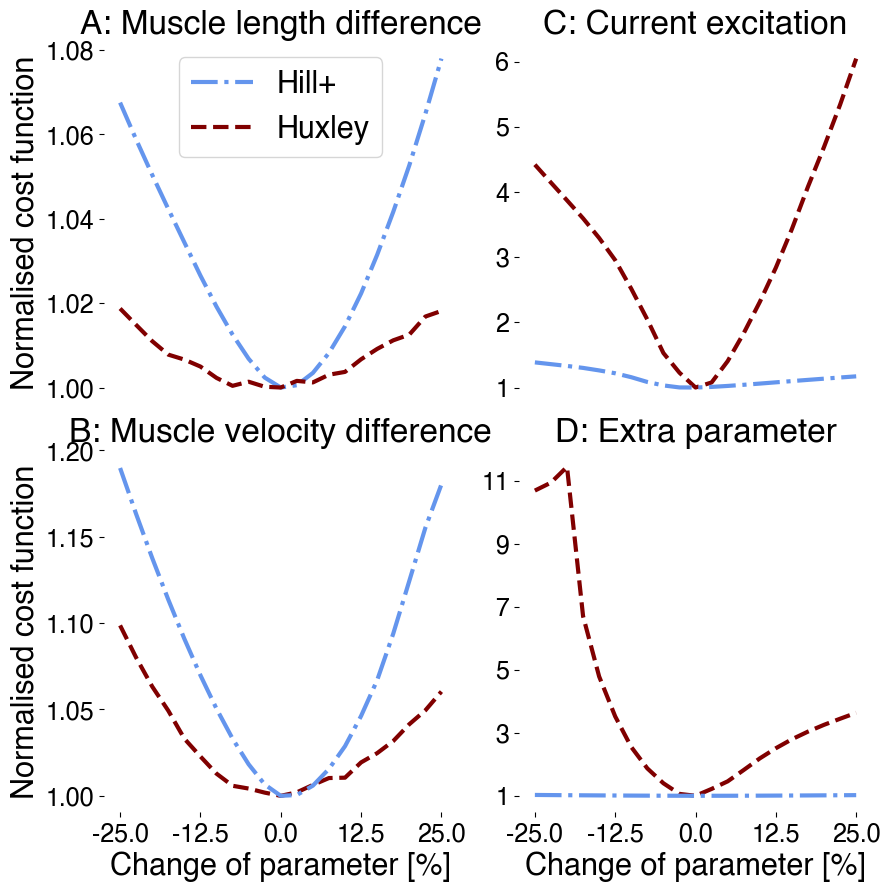

In [8]:
opt_hill1_feedback_vector = [ 1.79588357e+02 , 1.48266795e+01, -9.51596047e-01 ,-2.74214174e-02]
opt_hux_feedback_vector =[99.25994797 , 8.53835633 ,-1.24112202,  0.10921817]
hux_fbvector_multiplier_list = np.linspace(0.75,1.25,21)
xtick_vector = np.linspace(0.75,1.25,5)
optimal_cost_hux = 2.788380344310003
optimal_cost_hill1 = 3.7673798135587417
#hfont = {'fontname':'Helvetica'}
titlefont = 24
axlabelfont = 22
tickfont = 18
legendfont = 22

fig, axes = plt.subplots(2,2,figsize=(9,9))
axes[0][0].plot(hux_fbvector_multiplier_list,hill1data.integrated_trajectory_errors[0]/optimal_cost_hill1,label='Hill+',color='cornflowerblue',linewidth = 3,linestyle='dashdot')

axes[0][0].plot(hux_fbvector_multiplier_list,huxdata.integrated_trajectory_errors[0]/optimal_cost_hux,label='Huxley',color='maroon',linewidth = 3,linestyle='--')
#axes[0][0].plot(fbvector_multiplier_list,traj_error_data.integrated_trajectory_errors[:].mean('fbvar_nr'),label='mean')
#axes[0][0].set_yscale('log')
#axes[0][0].grid()
axes[0][0].set_title('A: Muscle length difference',fontsize=titlefont,fontname='Helvetica')#**hfont
#axes[0][0].set_xlabel('Change of parameter [%]',fontsize=14)
axes[0][0].set_ylabel('Normalised cost function',fontsize=axlabelfont)
axes[0][0].legend(fontsize=legendfont)
axes[0][0].set_xticks(xtick_vector);
axes[0][0].tick_params(axis='both', which='major', labelsize=tickfont);
axes[0][0].spines['left'].set_visible(False)  # Remove left border
axes[0][0].spines['top'].set_visible(False)  # Remove top border
axes[0][0].spines['right'].set_visible(False)  # Remove right border
axes[0][0].spines['bottom'].set_visible(False)  # Remove bottom border
axes[0][0].set_xticks([])

axes[1][0].plot(hux_fbvector_multiplier_list,huxdata.integrated_trajectory_errors[1]/optimal_cost_hux,label='Huxley',color='maroon',linewidth = 3,linestyle='--')
axes[1][0].plot(hux_fbvector_multiplier_list,hill1data.integrated_trajectory_errors[1]/optimal_cost_hill1,label='Hill_expanded',color='cornflowerblue',linewidth = 3,linestyle='dashdot')
#axes[1][0].grid()
axes[1][0].set_title('B: Muscle velocity difference',fontsize=titlefont)
axes[1][0].set_xlabel('Change of parameter [%]',fontsize=axlabelfont)
axes[1][0].set_ylabel('Normalised cost function',fontsize=axlabelfont)
#axes[1][0].legend(fontsize=14)
axes[1][0].set_xticks(xtick_vector);
axes[1][0].set_xticklabels((xtick_vector-1)*100);
axes[1][0].set_yticks(np.array(range(5))/20+1);
axes[1][0].tick_params(axis='both', which='major', labelsize=tickfont);
axes[1][0].spines['top'].set_visible(False)  # Remove top border
axes[1][0].spines['right'].set_visible(False)  # Remove right border
axes[1][0].spines['left'].set_visible(False)  # Remove left border
axes[1][0].spines['bottom'].set_visible(False)  # Remove bottom border


axes[0][1].plot(hux_fbvector_multiplier_list,huxdata.integrated_trajectory_errors[2]/optimal_cost_hux,label='Huxley',color='maroon',linewidth = 3,linestyle='--')
axes[0][1].plot(hux_fbvector_multiplier_list,hill1data.integrated_trajectory_errors[2]/optimal_cost_hill1,label='Hill_expanded',color='cornflowerblue',linewidth = 3,linestyle='dashdot')
axes[0][1].spines['left'].set_visible(False)  # Remove left border
#axes[0][1].grid()
axes[0][1].set_title('C: Current excitation',fontsize=titlefont)
#axes[0][1].set_xlabel('Change of parameter [%]',fontsize=14)
#axes[0][1].set_ylabel('Normalised cost function',fontsize=14)
#axes[0][1].legend(fontsize=14)
axes[0][1].set_xticks(xtick_vector);
axes[0][1].tick_params(axis='both', which='major', labelsize=tickfont);
axes[0][1].set_xticks([])

axes[0][1].spines['top'].set_visible(False)  # Remove top border
axes[0][1].spines['right'].set_visible(False)  # Remove right border
axes[0][1].spines['bottom'].set_visible(False)  # Remove bottom border


axes[1][1].spines['left'].set_visible(False)  # Remove left border
axes[1][1].spines['top'].set_visible(False)  # Remove top border
axes[1][1].spines['right'].set_visible(False)  # Remove right border
axes[1][1].spines['bottom'].set_visible(False)  # Remove bottom border
axes[1][1].plot(hux_fbvector_multiplier_list,huxdata.integrated_trajectory_errors[3]/optimal_cost_hux,label='Huxley',color='maroon',linewidth = 3,linestyle='--')
axes[1][1].plot(hux_fbvector_multiplier_list,hill1data.integrated_trajectory_errors[3]/optimal_cost_hill1,label='Hill_expanded',color='cornflowerblue',linewidth = 3,linestyle='dashdot')
#axes[1][1].grid()
axes[1][1].set_title('D: Extra parameter',fontsize=titlefont)
axes[1][1].set_xlabel('Change of parameter [%]',fontsize=axlabelfont)
#axes[1][1].set_ylabel('Normalised cost function',fontsize=14)
#axes[1][1].legend(fontsize=14)
axes[1][1].set_xticks(xtick_vector);
axes[1][1].set_xticklabels(((xtick_vector-1)*100));
axes[1][1].tick_params(axis='both', which='major', labelsize=tickfont);
axes[1][1].tick_params(axis='x', which='major', labelsize=tickfont);
axes[1][1].set_yticks((np.array(range(6)))*2+1);
fig.tight_layout(pad=1.0)
fig.savefig('drive/My Drive/TU/Master/MEP/Paper/Working_file_copied_from_final_code/Experiment_3+2b/Results/NEW_OKT_3c2_fbrobustness.png')

In [9]:
fig, axes = plt.subplots(2,1,figsize=(6,8))
#print(opt_x)
#integrated_trajectory_error = np.trapz((s_vals[:,1]-opt_a2)**2)+2*np.trapz((s_vals[:,0]-opt_a1)**2)
#integrated_trajectory_error = np.trapz(np.sqrt(opt_x[-1]**2+opt_y[-1]**2)-np.sqrt(coords_vals[:,1,-1]**2+coords_vals[:,0,-1]**2))

axes[0].plot(huxopttrajs.time,hill1opttrajs.sim_x4,label='x4 Hill_expanded',color='cornflowerblue',linewidth =3)
axes[0].plot(huxopttrajs.time,huxopttrajs.sim_x4,label='x4 Huxley',color='maroon',linewidth =3)
axes[0].plot(huxopttrajs.time,huxopttrajs.optimal_x4,label='x4 optimal',color='indigo',linewidth =3)
axes[0].set_xlabel('time [s]',fontsize=15)
axes[0].set_ylabel('length [m]',fontsize=15)
axes[0].legend(loc='upper right',fontsize=12)
axes[0].set_title('Simulated vs optimal x4 coordinates',fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].grid()

axes[1].plot(huxopttrajs.time,hill1opttrajs.sim_y4,label='y4 Hill_expanded',color='cornflowerblue',linewidth =3)
axes[1].plot(huxopttrajs.time,huxopttrajs.sim_y4,label='y4 Huxley',color='maroon',linewidth =3)
axes[1].plot(huxopttrajs.time,huxopttrajs.optimal_y4,label='y4 optimal',color='indigo',linewidth =3)
axes[1].set_xlabel('time [s]',fontsize=15)
axes[1].set_ylabel('length [m]',fontsize=15)
axes[1].legend(loc='lower right',fontsize=12)
axes[1].set_title('Simulated vs optimal y4 coordinates',fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].grid()

fig.tight_layout(pad=1.0)
fig.savefig('drive/My Drive/TU/Master/MEP/Paper/Working_file_copied_from_final_code/Experiment_3+2b/Results/NEW_OKT_3a2_optimalcoordinates.png')

In [10]:
fig, axes = plt.subplots(1,1,figsize=(6,6))
titlefont = 24
axlabelfont = 22
tickfont = 18
legendfont = 21

axes.plot(hill1opttrajs.sim_x4,hill1opttrajs.sim_y4,label='Hill+',color='cornflowerblue',linewidth =4,linestyle='dashdot')
axes.plot(huxopttrajs.sim_x4,huxopttrajs.sim_y4,label='Huxley',color='maroon',linewidth =4,linestyle='--')
axes.plot(huxopttrajs.optimal_x4,huxopttrajs.optimal_y4,label='optimal',color='indigo',linewidth =4)
axes.set_xlabel('x [m]',fontsize=axlabelfont)
axes.set_ylabel('y [m]',fontsize=axlabelfont)
axes.legend(fontsize=legendfont)#loc='lower left',
axes.set_title('End-point trajectories',fontsize=titlefont)
axes.tick_params(axis='both', which='major', labelsize=tickfont)
axes.set_xticks(np.linspace(-0.04,0.08,3))
axes.set_yticks(np.linspace(0.4,0.54,3))
axes.grid()
axes.spines['left'].set_visible(False)  # Remove left border
axes.spines['top'].set_visible(False)  # Remove top border
axes.spines['right'].set_visible(False)  # Remove right border
axes.spines['bottom'].set_visible(False)  # Remove bottom border
axes.set_xlim([-0.05,0.09])
fig.tight_layout(pad=2.0)
fig.savefig('drive/My Drive/TU/Master/MEP/Paper/Working_file_copied_from_final_code/Experiment_3+2b/Results/NEW_OKT_3a2_optimaltrajectories.png')

In [11]:
hux_xspeed = np.zeros(len(huxopttrajs.time))
hill_xspeed = np.zeros(len(huxopttrajs.time))
opt_xspeed = np.zeros(len(huxopttrajs.time))
hux_yspeed = np.zeros(len(huxopttrajs.time))
hill_yspeed = np.zeros(len(huxopttrajs.time))
opt_yspeed = np.zeros(len(huxopttrajs.time))
for i in range(len(hux_xspeed)-1):
  hux_xspeed[i] = (huxopttrajs.sim_x4[i+1]-huxopttrajs.sim_x4[i])/0.001
  hill_xspeed[i] = (hill1opttrajs.sim_x4[i+1]-hill1opttrajs.sim_x4[i])/0.001
  opt_xspeed[i] = (huxopttrajs.optimal_x4[i+1]-huxopttrajs.optimal_x4[i])/0.001
  hux_yspeed[i] = (huxopttrajs.sim_y4[i+1]-huxopttrajs.sim_y4[i])/0.001
  hill_yspeed[i] = (hill1opttrajs.sim_y4[i+1]-hill1opttrajs.sim_y4[i])/0.001
  opt_yspeed[i] = (huxopttrajs.optimal_y4[i+1]-huxopttrajs.optimal_y4[i])/0.001

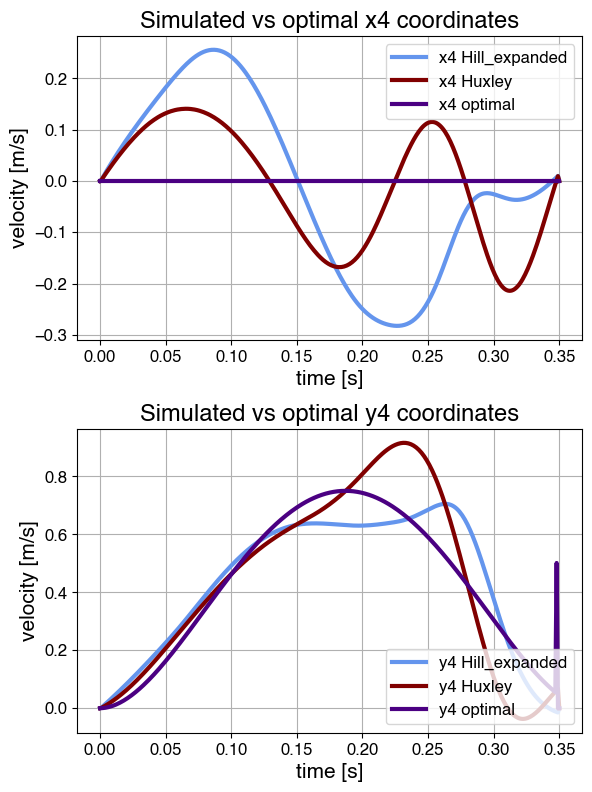

In [12]:
fig, axes = plt.subplots(2,1,figsize=(6,8))
#print(opt_x)
#integrated_trajectory_error = np.trapz((s_vals[:,1]-opt_a2)**2)+2*np.trapz((s_vals[:,0]-opt_a1)**2)
#integrated_trajectory_error = np.trapz(np.sqrt(opt_x[-1]**2+opt_y[-1]**2)-np.sqrt(coords_vals[:,1,-1]**2+coords_vals[:,0,-1]**2))

axes[0].plot(huxopttrajs.time,hill_xspeed,label='x4 Hill_expanded',color='cornflowerblue',linewidth =3)
axes[0].plot(huxopttrajs.time,hux_xspeed,label='x4 Huxley',color='maroon',linewidth =3)
axes[0].plot(huxopttrajs.time,opt_xspeed,label='x4 optimal',color='indigo',linewidth =3)
axes[0].set_xlabel('time [s]',fontsize=15)
axes[0].set_ylabel('velocity [m/s]',fontsize=15)
axes[0].legend(loc='upper right',fontsize=12)
axes[0].set_title('Simulated vs optimal x4 coordinates',fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].grid()

axes[1].plot(huxopttrajs.time,hill_yspeed,label='y4 Hill_expanded',color='cornflowerblue',linewidth =3)
axes[1].plot(huxopttrajs.time,hux_yspeed,label='y4 Huxley',color='maroon',linewidth =3)
axes[1].plot(huxopttrajs.time,opt_yspeed,label='y4 optimal',color='indigo',linewidth =3)
axes[1].set_xlabel('time [s]',fontsize=15)
axes[1].set_ylabel('velocity [m/s]',fontsize=15)
axes[1].legend(loc='lower right',fontsize=12)
axes[1].set_title('Simulated vs optimal y4 coordinates',fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].grid()

fig.tight_layout(pad=1.0)
fig.savefig('drive/My Drive/TU/Master/MEP/Paper/Working_file_copied_from_final_code/Experiment_3+2b/Results/NEW_OKT_3a2_optimalcoordinates_speed.png')